# Load dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd

# read csv file into a pandas dataframe and keep NA values
df = pd.read_csv('/content/tch-pca-2.csv.updated.csv',keep_default_na=False)
print(df)

        pathloss  doppler shift label
0     -23.265006       3.722180    NA
1     -16.482655       1.153439    NA
2     -14.824642       0.859113    NA
3     -18.508977      -1.653258    NA
4     -12.481515       1.505040    LA
...          ...            ...   ...
22004 -12.296848      -1.881210    NA
22005   4.667890      -0.824496    NA
22006  -1.851043      -2.783185    NA
22007   4.722575      -1.217843    NA
22008  -0.278318      -1.183628    NA

[22009 rows x 3 columns]


# Thống kê các label

NA    10995
SO     2224
JJ     2205
LA     1716
LL     1645
RL     1641
RA     1583
Name: label, dtype: int64


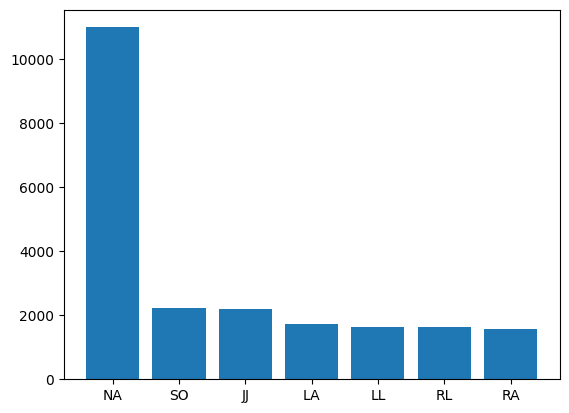

In [6]:
import matplotlib.pyplot as plt
value_counts = df['label'].value_counts().sort_values(ascending=False)
print(value_counts)
plt.bar(value_counts.index, value_counts.values)
plt.show()

# Xử lý imbalance

In [8]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = df.drop('label', axis=1)
y = pd.DataFrame(df['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print('Number of samples in each class before oversampling:')
print(df['label'].value_counts())

print('Number of samples in each class after oversampling:')
print(y_train_resampled.value_counts())

Number of samples in each class before oversampling:
NA    10995
SO     2224
JJ     2205
LA     1716
LL     1645
RL     1641
RA     1583
Name: label, dtype: int64
Number of samples in each class after oversampling:
label
JJ       8796
LA       8796
LL       8796
NA       8796
RA       8796
RL       8796
SO       8796
dtype: int64


In [9]:
label_to_number = {
    "NA": 0,
    "LA": 1,
    "RA": 2,
    "LL": 3,
    "RL": 4,
    "JJ": 5,
    "SO": 6
}

# Convert the labels to numbers.
y_train['label'] = y_train['label'].apply(lambda x: label_to_number[x])
y_test['label'] = y_test['label'].apply(lambda x: label_to_number[x])

# Print the converted labels.
print(y_train)

       label
6042       0
7804       1
6920       5
5358       5
6744       0
...      ...
16065      6
6385       0
7450       0
7452       0
9923       6

[17607 rows x 1 columns]


# Apply model

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


1761/1761 [==============================] - 7s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0780
Epoch 2/20
1761/1761 [==============================] - 3s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0780
Epoch 3/20
1761/1761 [==============================] - 4s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0780
Epoch 4/20
1761/1761 [==============================] - 4s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0780
Epoch 5/20
1761/1761 [==============================] - 3s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0780
Epoch 6/20
1761/1761 [==============================] - 3s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0780
Epoch 7/20
1761/1761 [==============================] - 4s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0780
Epoch 8/20
1761/1761 [==============================] - 4s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0780
Epoch 9/20
1761/1761 [==============================] - 3s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0780
Epoch 10/20
1761/1761 [==============================] - 

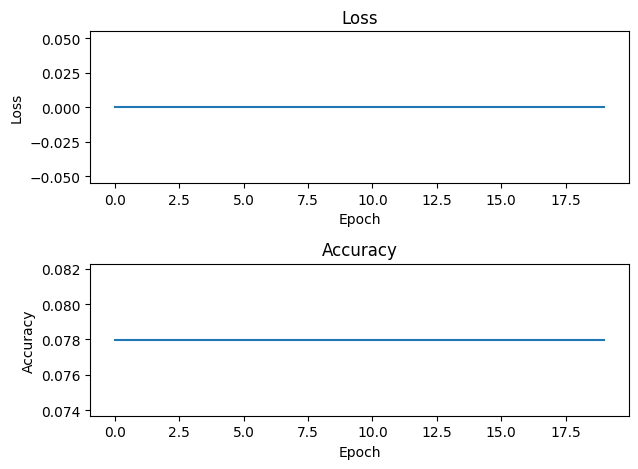

In [42]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
import matplotlib.pyplot as plt
import numpy as np


#X_train = X_train.to_numpy()
#X_test = X_test.to_numpy()

X_train = X_train.reshape(-1, X_train.shape[1], 1)
X_test = X_test.reshape(-1, X_test.shape[1], 1)

model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu',padding='same', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=64, kernel_size=3, activation='relu',padding='same'))
model.add(MaxPooling1D(pool_size=2,padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='softmax'))
opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


model.fit(X_train, y_train, epochs=20, batch_size=10)

#loss, accuracy = model.evaluate(X_test, y_test)

history = model.history

loss = history.history['loss']
accuracy = history.history['accuracy']
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(np.arange(len(loss)), loss, label='Loss')
ax2.plot(np.arange(len(accuracy)), accuracy, label='Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Accuracy')
plt.tight_layout()


plt.show()
#print('Validation loss:', loss)
#print('Validation accuracy:', accuracy)